# Counting Twitter Visits Demo Notebook

#Summary and Credits
This notebook is designed to introduce the users to the Python Tweets Trajectory Preprocessing Library function count_visits. This library is designed for the purpose of counting the number of travellers who send geolocations on Twitter that indicate extraurban mobility. 

This notebooks was created by Dr. Su Han and Ben Liebersohn. This was also made possible by CyberGIS Center *Social Media and Viz Team* fellow teammate Mike Qin, and CyberGIS Center Director Prof. Shaowen Wang. Additional thanks to CyberGIS Center teammate Becky Vanderwelle and to CyberGIS Center Coordinator Dr. Anand Padmanaman for their collective advice and support with Python computing and data storage. We also thank CyberGIS Center Fellow Dr. Ziqi Li and CyberGIS Center Member Alexander Michaels for advice.

Created at **The University of Illinois CyberGIS Center**. Created: 3/30/2021. Last updated: 3/08/2021.

# What's in the Notebook:

*   Summary and Credits
*   Introduction: Why and How
*   How to use this notebook
*   Algorithm overview
  *   Compressing trajectories
  *   Counting visits
  *   Moving window
*   Data
*   Functions (code)
*   Counting visits demo query
*   Conclusion

#Introduction
This notebook contains code written by Su Han, which reads in Twitter data, and returns an analysis of the movement of its users. This is intended for use among those who want to model the Covid-19 pandemic behaviour from 2020, and is framed around detecting travel at the Metro-Statistical-Area level. The purpose of this code and data is to model Covid-19 risk using the information provided by Twitter.  
The purpose of this notebook is to demonstrate the functionality of the code used for processing Twitter data. This notebook reads in Twitter data that appears to be by humans, and counts the visits each user make to each city as a visit. Adding their visits together, it outputs a summary table containing each date as a column, and each metropolitan statistical area (MSA) as a row.

The data is captured by the Twitter API. This code written in entirely PEP-8 compliant Python 3.

#How to use this notebook
This notebook contains three sections of Python scripts.
These are the sections: 
*   **Setup**, is a simple set of commands which download data from a URL, and save this data to our Jupyter runtime environment (such as CyberGISX). These commands can be repetitive if your data is still available on the Jupyter environment.
*   **Code**, is one cell containing the code to count visits. This cell contains many detailed comments which describe what is step happening, so that a user can quickly understand how it produces a result.
*   **Running the scripts** is a section containing practical examples of how one calls the functions to count the number of visits to each MSA. 

Finally, you will get to use the code in a demo, which calls countvisits()

#Algorithm overview
This section describes some of the steps our code takes to achieve its results. This is helpful if you want to try to understand in detail what our code is doing, and what intermediate steps are happening between the input and the output. 

**Compressing trajectories**

We don't need tweets that are not indicitive of travel. To remove unnecessary messages, the algorithm removes a user's tweet record if it has the same location as theat user's previous tweet. This can reduce the size of the data for counting visits, with respect to one location at a time. 

Limitation: this drops the intermediate travel before or between visits to one location. Limitation example: If we are counting visits to Chicago, a user may travel to: Miami>Denver>NYC>Chicago, and our algorithm will keep NYC>Chicago. This is limitation for considering the COVID-19 infection risk presented by a traveller such as the one I described.


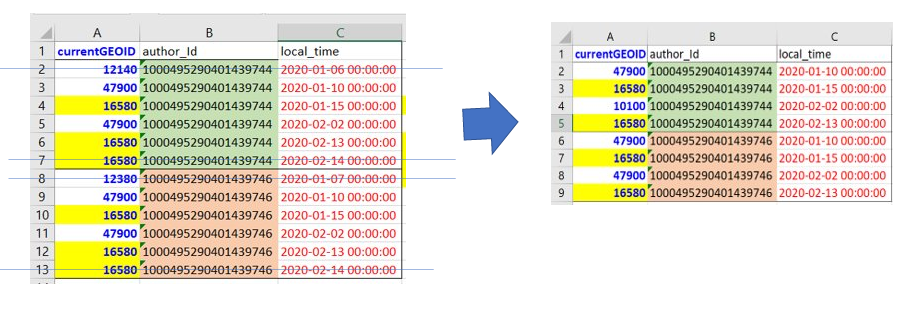



**Counting visits**

The number of visits by each user can be summed up for each day, and provide a rough estimate of the number of travellers who arrived in the area, when compared with the prior days. This is a summation that is in local time, and a step that provides our output file.

Limitation: These are practical limitations. We are only looking at Twitter users. There many be visits that go undetected. This count is going to be a low-bound estimate on the number of visitors. For analysis, it is important to control for this, and to not consider a count as a "precise" estimate. A second limitation is that this is entirely dependent on the cost-free Twitter Dev API, which contains noise that lowers the accuracy of a daily count. Third, if a visitor decides to not tweet, or waits to tweet, we will have no way of knowing.

Limitation example: This can mean that when you see 0 visits, there *were* visits that went under the radar.



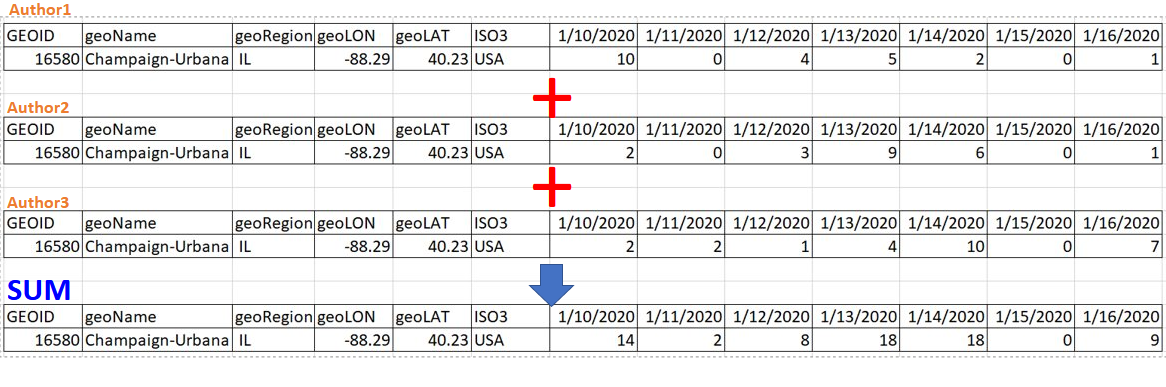


**Moving Window**

In order to get a relatively accurate count, we are considering the number of visitors as a sum of the number of visitors over the last N days. By default, it count be presumed that 1 day is a good number to work with (rather than hourly or minute-by-minute data) however we find that for conducting a COVID-19 risk estimate, 7-11 days is important, because of the known incubation period of this still dangerous virus. From a practical perspective, if visitors have the virus, and visit yesterday, then today they likely still have the virus. This moving window approach allows us to change our sensitivity to changes, and as a benefit, it smooths out short-term noise from the Twitter API. This graphic, below, visualizes the rules for what gets counted when we use the moving window technique. Some travel is counted as a visit, and other types of travel are within the city, and do not count as a new visit to those places.

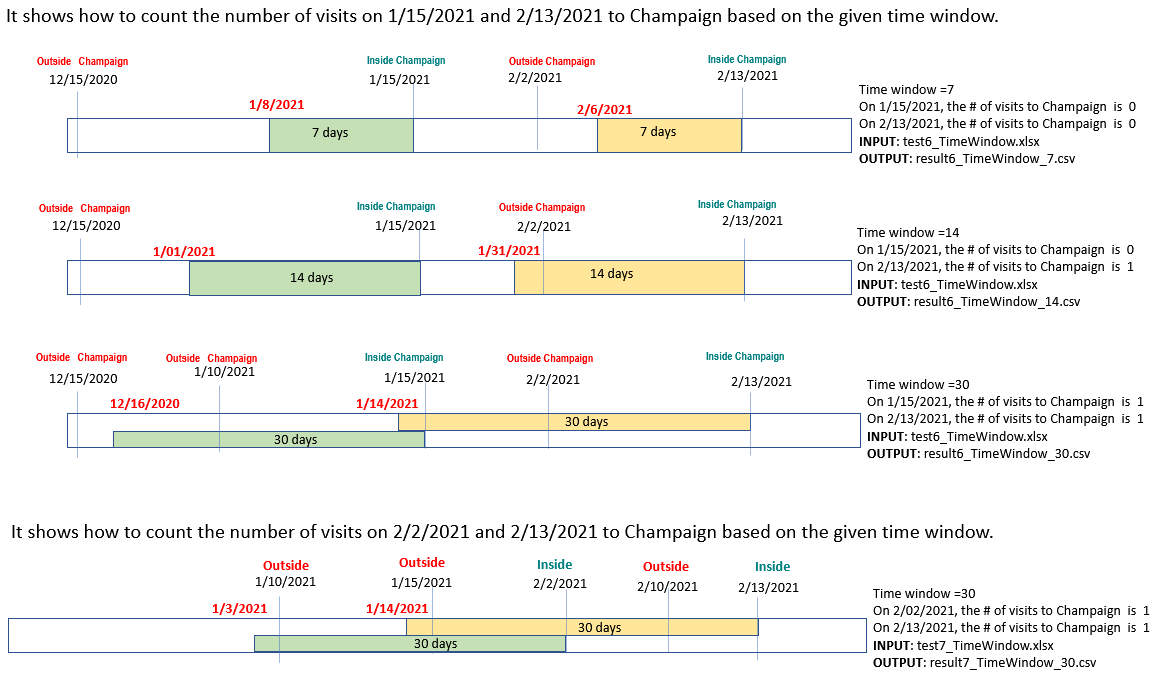

##Data
The demo data gathered for using this code is comprised of testing and real data. For using for a demo with real data, we will use data from January 2020.
To run these scripts, we will use the following files:

GeoID_name.csv - This file contains the ID number, and the name of each place we are looking at. In this file, you can find the number for the name, or the name for the number, if you wish to make some queries regarding a specific place.

twitter.streaming7_all_byHuman_20201201_20201231.csv - this file contains a series of tweets from one month. Each Tweet is geolocated, and contains a bounding box to tell us how precise that location really is.
The project Data Catalog lists all 2020.

The MSA you are working with for is handled with a numeric GEOID.

This interactive webtool maps GEOIDs:
http://su-gis.iptime.org/LNE/pick_POI.html

Mount the CyberGIS Google Drive for full data availability. Otherwise you will be able to find the file twitter.streaming7_all_byHuman_20201201_20201231.csv in Github.

To access these Google Drive folders you must be a part of the CIGI-CyberGIS Google group.

In this code the data is pulled from Git. If it were to fail, however:

GeoID_name.csv is kept in the following Google Drive directory:
 [CIGI-CyberGIS>Teams>CyberGIS-Viz-Socialmedia>20200720_code_mobility>COVID_data](https://drive.google.com/drive/folders/1xkdewCGw6iBhpJnVMCD3seN7rTzfGhJC?usp=sharing) 

twitter.streaming7_all_byHuman_20201201_20201231.csv is kept in the following Google Drive directory:

[CIGI-CyberGIS>CyberGIS-Viz-SocialMedia>Example Data>twitter.streaming7_all_byHuman_20201201_20201231.csv](https://drive.google.com/file/d/1tAZLSrLPI01hCBZUz3UEPtlEHxWqK1aU/view?usp=sharing)


In [ ]:
#Download the name of each GeoID
import pandas as pd # This import is repeated in case we are only running one cell, and not the other.
url = 'https://raw.githubusercontent.com/cybergis/twitter_example/main/GeoID_name.csv'
df = pd.read_csv(url,encoding='latin1') # the Latin American accents make the format read in differently.
df.to_csv("./GeoID_name.csv")
# Latin1 allows us to use accents. Example: Española, New Mexico
# Suggested by Talha Rasool, https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c

#Functions/Main Code

 How to use the code if you are unsure:
 To run that function, you will need input files that are described both above.
 The output from that function will be a .csv
 APIs change. This code comes with no futureproofing warranty - it is possible you may get an error.
 If you think that error is a runtime error, contact Ben Liebersohn at bliebe3@illinois.edu to work out the issues.

 Last update 4/7/21

The counting visitors script has been designed to process .csv files with Tweets. These files contain trajectories from Twitter users.
A visit is when someone comes to a place from outside of that place. Thus, this script will detect a real human traveling.

We are looking at the medium-small area, for better precision. If we use all USA, the precision is low and not helpful for modeling more local Covid-19 risk.
With real-world data, the travel varies and can be smoothed to a multi-day scale. 

Overview: the structure of the script functions. See that function in this text to learn more about how that function is used.
* countvisits()
 *  generateReport()
   *   getNextUser()
   *   generateVisitsList()
  *   createVisitsDataframe()

Finally, generateReport() writes CSV output to the directory, and countvisits() ends. 
 
As a user, you only need countvisits(), because it is essentially the main() function.

To get started, we will import the necessary libraries.

In [ ]:
# -*- coding: utf-8 -*-

#The next lines (commented out) are not necessary for a demo. However, if you are a Drive user and you wish to use data hosted on Drive, you need to mount Drive. 
#from google.colab import drive
#drive.mount('/content/gdrive') 
import sys, getopt
import copy
import csv
import subprocess
import os
from datetime import date
import datetime
from datetime import datetime
from datetime import timedelta
from pytz import timezone
import pytz
import math
from operator import itemgetter, attrgetter
import pandas as pd


First, Tweets are defined as objects in the Tweets class, which assigns a series of variables contained in each Tweet. authorID, currentGEOID, 


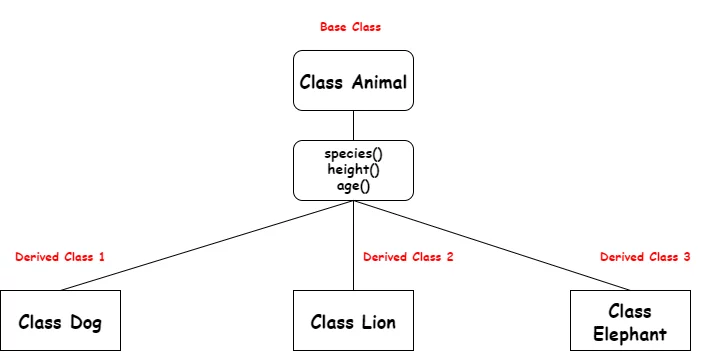

A word on classes and the Tweets class.

'Tweets' is a class. In Python jargon, a class means that this is a blueprint of something. This is an object oriented programming (OOP) feature in Python. A class can be used with the __init__ function to accept parameters. 

The class Tweets contains function getNextUser(). The function will read in data from a CSV and store this in a Pandas dataframe. 

If EOF, (Excel caused) the input cols like this: ['', '', '', '', '', '', '', '', ...] will terminate the step of reading.

You can learn more about Python class feature here: https://www.askpython.com/python/oops/object-oriented-programming-python


In [ ]:
class Tweets:
    
    first_dt = datetime.now()
    started_dt = datetime.now()
    filename = None
    csvfile = None
    csvreader = None
    previousID = None
    seq = 0
    currentGEOID = None
    name = None
    authorID = None
    localTime = None
    
    # The init initializers below is required because Tweets is a class class, so 
    # if we want to call it and pass a parameter we will need to include _init__()
    def __init__(self, filename):
        self.filename = filename
        self.csvfile = open(self.filename, 'r', encoding='utf-8')
        self.csvreader = csv.reader(self.csvfile, delimiter=',')
        headers = self.csvreader.__next__()
        #print(headers)
    # getNextUser() will read in valid data
    def getNextUser(self):
        if (self.seq == -1):
            #print("No more data in the input file: {}".format(self.filename))
            return None
        
        if (self.previousID is None):                           # check: if it is is first time?
            cols = next(self.csvreader, None)
            #print('length:', len(''.join(cols)), ''.join(cols))
            if (cols is None or len(''.join(cols)) == 0):       # is EOF? 
                self.csvfile.close()
                self.seq = -1                                   # set EOF sign to self.seq
                print("No data in the input file: {}".format(self.filename))
                return None
            self.seq += 1
            self.currentGEOID = int(cols[6])
            self.name = cols[7]
            self.authorID = cols[8]
            self.localTime = cols[10]
            self.previousID = self.authorID
        
        lst = [[self.seq, self.currentGEOID, self.authorID, self.localTime, self.name]]
        while (True):
            cols = next(self.csvreader, None)
            if (cols is None or len(cols[8]) == 0):             # is EOF?
                self.csvfile.close()
                print("Total    Documnt count: %+14s" % ("{:,d}".format(self.seq)))
                self.seq = -1                                   # set EOF sign to self.seq
                break
            self.seq += 1
                                                                # Increment to next message, and save (self.seq ++), Data will be written to the Pandas dataframe.
                                                                # Report only once every million.
                                                                # This makes the reporting once every million not too many. One to report records in long scripts.

            if (self.seq % 1000000 == 0):
                now_dt = datetime.now()
                laptime = now_dt - self.started_dt
                total_seconds = int(laptime.total_seconds())
                hours, remainder = divmod(total_seconds,60*60)
                minutes, seconds = divmod(remainder,60)
                laptimeString = '{:02d}:{:02d}'.format(minutes, seconds)
                elapsed = now_dt - self.first_dt
                total_seconds = int(elapsed.total_seconds())
                hours, remainder = divmod(total_seconds,60*60)
                minutes, seconds = divmod(remainder,60)
                elapsedString = '{:02d}:{:02d}:{:02d}'.format(hours, minutes, seconds)
                print('%s     %+14s        Lap %s    Elapsed %s' % 
                    (now_dt.strftime('%Y-%m-%d %H:%M:%S'), "{:,d}".format(self.seq), laptimeString, elapsedString))
                self.started_dt = now_dt
            self.currentGEOID = int(cols[6])
            self.name = cols[7]
            self.authorID = cols[8]
            self.localTime = cols[10]
            if (self.previousID != self.authorID): break        # key break
            lst.append([self.seq, self.currentGEOID, self.authorID, self.localTime, self.name])
            
        df = pd.DataFrame(lst, columns=['seq', 'geoid', 'authorID', 'localTime', 'name'])
        #print(df)
        self.previousID = self.authorID                         # save authorID for next
        return df

Using:`if (self.seq % 1000000 == 0):`

Reports only once every million Tweets.

This makes the reporting Tweet information on regular but still useful intervals. Records being reported in real time overwhelm the user, and no data reports can be difficult when we want an affirmation that the program is still working when leaving a runtime open for many hours.

getSearchCenter() connects the place with the geoid in question. The function reads in a file called the searchCenter file, in our example this is GeoID_name.csv. A GEOID matches to a location name.
This GEOID is the MSA ID number.
**You can open the file GeoID_name.csv to find the name of the MSA ID,** or vice versa.


In [ ]:
def getSearchCenter(searchcenterFileName): 
    dict = {}
    print(searchcenterFileName)
    with open(searchcenterFileName, 'r', encoding='utf-8') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        headers = csvreader.__next__()
        if (len(headers) != 6):
            print(', '.join(headers))
            sys.exit("CSV file format error.")
        i = 0
        eCount = 0
        for row in csvreader:		
            i += 1
            print(i, ', '.join(row))                # 15860, Cañon City
            geoid     =  row[0]
            name      =  row[1]
            region    =  row[2]
            lat       =  float(row[3])
            lon       =  float(row[4])
            iso3      =  row[5]
            searchCenter = {'geoid': geoid, 'name': name, 'region': region, 'lat': lat, 'lon': lon, 'iso3': iso3}
            #print searchCenter
            dict[geoid] = searchCenter
    print("Search Center Count: %d" % (i))
    #print dict
    return dict

**GenerateVisitsList() takes in a dataframe with Tweets by one user, and writes output of how many visits were made in a given timeframe, or time window.** This is user specified
This is a variable you can change with timeWindow input, for example we gave: 7



In [ ]:
def generateVisitsList(beginDate, endDate, city, df_tweetsByUser, outputfile, timeWindow):
    rIndex = dict()        # {gooid1: rowNumber1, gooid2: rowNumber2, ...}
    result = []            # [[geoid, 0, 0, 0, ....], [], [], [], ...]
    # Get variables ready for generating a report later on.
    fDatetime = datetime.strptime(beginDate, "%Y-%m-%d")
    tDatetime = datetime.strptime(endDate, "%Y-%m-%d")
    fDate = date(fDatetime.year, fDatetime.month, fDatetime.day)
    tDate = date(tDatetime.year, tDatetime.month, tDatetime.day)
    nDays = (tDate - fDate).days + 1
    #print("nDays: {}    {} - {}".format(nDays, fDate.strftime('%Y-%m-%d'), tDate.strftime('%Y-%m-%d')))
    
    for i, row in df_tweetsByUser.iterrows():
        
        if (i == 0): 
            prev = row
            continue
        cols = row
        seq = cols["seq"]
        geoid = cols["geoid"]
        authorID = cols["authorID"]
        localDate = cols["localTime"][:10]
        name = cols["name"]
        
        if (localDate < beginDate or localDate > endDate): continue
        
        if (prev["geoid"] != geoid):
            pDatetime = datetime.strptime(prev["localTime"][:10], "%Y-%m-%d")
            pDate = date(pDatetime.year, pDatetime.month, pDatetime.day)
            iDatetime = datetime.strptime(localDate, "%Y-%m-%d")
            iDate = date(iDatetime.year, iDatetime.month, iDatetime.day)
            bDelta = iDate - pDate
            if (timeWindow < 0 or bDelta.days <= timeWindow):
                # j: index of result list by geoid, if not append new line to the end of it
                if (geoid in rIndex): j = rIndex[geoid]
                else:
                    # create new row for result list
                    newRow = [geoid]
                    nPrefix = len(newRow)                  # nPrefix is 1
                    newRow.extend([0] * (nDays))           # newRow is a list as like [geoid, 0, 0, 0, ....]
                    result.append(newRow)
                    j = len(result) - 1                    # the last index in the list
                    rIndex[geoid] = j
                delta = iDate - fDate
                result[j][delta.days+nPrefix] += 1         # nPrefix means number of prefix column in the row
        
        prev = cols
    return result


The visits data will next be stored in a dataframe, from list and then all zero columns are dropped.

**createVisitsDataframe() is a function which creates a Pandas dataframe to store the number of visits.**

In [ ]:
def createVisitsDataframe(aUserVisitsList, df_geoInfomation, fDate, tDate):    
    headers = ['GEOID']
    nPrefix = len(headers) + 6         # 6 means number of inserted columns between 'GEOID' and 'date1'
    wDate = copy.deepcopy(fDate)
    #headers.append(wDate.strftime('%Y-%m-%d'))
    headers.append(wDate.strftime('%m/%d'))
    while (True):
        wDate += timedelta(days=1)
        if (wDate > tDate): break
        #headers.append(wDate.strftime('%Y-%m-%d'))
        headers.append(wDate.strftime('%m/%d'))
    #print(headers)
    df = pd.DataFrame(aUserVisitsList, columns=headers)
    
    # create 5 lists of value to insert to the data frame
    geoNames = []
    geoRegions = []
    geoLONs = []
    geoLATs = []
    geoISO3s = []
    geoTotals = []
    for row in aUserVisitsList:
        geoid = row[0]
        geoName, geoRegion, geoLON, geoLAT, geoISO3 = getGeoInformation(geoid, df_geoInfomation) # we copy the information from a function run on a geoid
        geoNames.append(geoName)
        geoRegions.append(geoRegion)
        geoLONs.append(geoLON)
        geoLATs.append(geoLAT)
        geoISO3s.append(geoISO3)
        geoTotal = 0
        for col in row[1:]:
            geoTotal += col
        geoTotals.append(geoTotal)
    
    # insert 5 columns to the data frame
    df.insert(loc=1, column="geoName", value=geoNames)
    df.insert(loc=2, column="geoRegion", value=geoRegions)
    df.insert(loc=3, column="geoLON", value=geoLONs)
    df.insert(loc=4, column="geoLAT", value=geoLATs)
    df.insert(loc=5, column="geoISO3", value=geoISO3s)
    df.insert(loc=6, column="geoTotal", value=geoTotals)
    
    # delete all zeros column in the df
    columnNames = list(df.columns)[nPrefix:]       # get column names only date
    for columnName in columnNames:
        if (df[columnName].sum() == 0):
            del df[columnName]
    
    return df

getGeoInformation() reads in the geographic information (name, region, lon, lat, iso3) based on a GEOID. You can find these GEOIDs in GeoID_name.csv. 

In [ ]:
def getGeoInformation(geoid, df_geoInfomation):
    try:
        #scRow = df_geoInfomation.loc[int(geoid), : ]
        scRow = df_geoInfomation.loc[int(geoid), : ]
        geoName = scRow["NAME"]
        geoRegion = scRow["region"]
        geoLON = scRow["LON"]
        geoLAT = scRow["LAT"]
        geoISO3 = scRow["ISO3"]
    except KeyError:
        geoName = ""
        geoRegion = ""
        geoLON = 0.0
        geoLAT = 0.0
        geoISO3 = ""
    return geoName, geoRegion, geoLON, geoLAT, geoISO3

 **Generate report is what loops over a file, and handles the iterative processing.**
* If the file falls into a given space and time criteria
* Those records can be collected and recorded
* This is a list that gets sorted by GEOID
* Finally, it is written as a list.

Tip: Try using print() here in a loop if you want to find what text is giving you trouble here.

**countvisits() function is the entrypoint to this script.**
This, instead, uses countvisits() as the primary user entry point, since it is what will call upon other functions.
To start, beginDate, and endDate are required in YYY/MM/DD format. You also need to pass the path to the input CSV.
The outputfile is just the name and directory for output to go, you can choose a name but I try to be systematic.
Searchcenter is the key file you are using (GeoID_place.csv) and timeWindow is the number of days you are summing (smallers = 1, I recommend at least 3)

In [ ]:
def countvisits (beginDate, endDate, city, inputfile, outputfile, searchcenter, timeWindow):
    
    started_datetime = datetime.now()
    dateYYMMDD = started_datetime.strftime('%Y%m%d')
    timeHHMMSS = started_datetime.strftime('%H%M%S')
    print('Count_Visits.py start at %s' % (started_datetime.strftime('%Y-%m-%d %H:%M:%S')))
    
    df_searchcenter = pd.read_csv(searchcenter)
    df_searchcenter.set_index("GEOID", inplace=True)
    #print(df_searchcenter)
    
    generateReport(beginDate, endDate, city, inputfile, outputfile, df_searchcenter, timeWindow) # this is the primary function.
    
    ended_datetime = datetime.now()
    elapsed = ended_datetime - started_datetime
    total_seconds = int(elapsed.total_seconds())
    hours, remainder = divmod(total_seconds,60*60)
    minutes, seconds = divmod(remainder,60)	
    print('Count_Visits.py ended at %s    Elapsed %02d:%02d:%02d' % (ended_datetime.strftime('%Y-%m-%d %H:%M:%S'), hours, minutes, seconds))

# Counting visits demo query

This function is going to compress each user's trajectories to remove extraneous data, so that the data recorded is only visits. These printed data are pandas dict columns - the list of visits is column 'currentGEOID', and the list of visits is column 'visits'.

example query: visits to Champaign Urbana IL (GEOID 16580)

python Count_Visits.py 
-b 2020-02-13 
-e 2020-02-25 
-c "16580" 
-i ./input.csv
-o ./output_7.csv 
-s ./GeoID_name.csv 
-t 7

In [ ]:
countvisits('2020-12-01','2020-12-31',"", '/content/drive/MyDrive/CyberGIS-Viz-SocialMedia/Example Data/twitter_streaming7_all_byHuman_20201201_20201231.csv', './twitter_out_7_all_byHuman_20201201_20201231.csv', './GeoID_name.csv', 7)

# Conclusion
This notebook has shown you the basics of how to: 

*   get the data required
*   use this code
*   the code itself works

After generating the output file, you will have a measurement of the number of intraurban visitors to each MSA. This is important for future work in mobility analysis, and for the purposes of the project, risk analysis modelling.